<a href="https://colab.research.google.com/github/kumudu12/EN5870/blob/main/Assignment_02_on_Backpropagation%2C_SVM_and_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Linear regression is a supervised learning technique used to model the relationship between a set of input features (X) and a target variable (y). Perform linear regression to learn parameters (weight vector) for the given data set.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Data generation
X_train = np.array([[1, 50], [5, 20], [3, 80], [5, 60], [6, 90]]).astype(np.float64)
y_train = np.array([0, 0, 1, 1, 1])
X_test = np.array ([[1 , 40], [5, 10], [2, 60], [6, 65], [7, 50]]).astype(np.float64)
y_test = np.array ([0, 0, 0, 1, 1])

#Create linear regression object
regr = linear_model.LinearRegression()

#Train the model
regr.fit(X_train, y_train)

#Make predictions
y_pred = regr.predict(X_test)

#The coeffcients
print("Coefficients:  ", regr.coef_)
#The mean squared error
print("Mean squared error: %.2f" %mean_squared_error(y_test, y_pred))
#The coefficient of determination:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients:   [0.0955414  0.01571125]
Mean squared error: 0.05
Coefficient of determination: 0.78


(5, 2) (5,)
(5,) (5,)


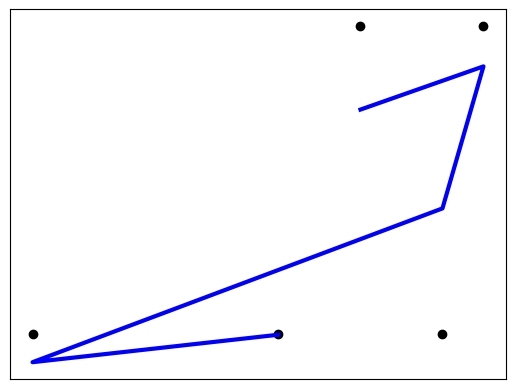

In [17]:
print(X_test.shape, y_test.shape)
print(X_test[:, 1].shape, y_test.shape)

#Plot outputs
plt.scatter(x=X_test[:, 1], y=y_test, color="black")
plt.plot(X_test[:, 1], y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

3.  Train SVM classifier using the training data and predict the output for the testing
data (you may use clf = SVC(kernel=’linear’, random_state=42)
clf.fit(X_train, y_train)). What is the accuracy of the model?

In [19]:
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

clf_preditions = clf.predict(X_test)
print(accuracy_score(clf_preditions, y_test))

0.6


4. Plot the training data and SVM decision boundary

<ipython-input-34-0015169d5ecc>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[:, 0], X_train[:, 1], c='y', zorder=10, cmap=plt.cm.Paired)


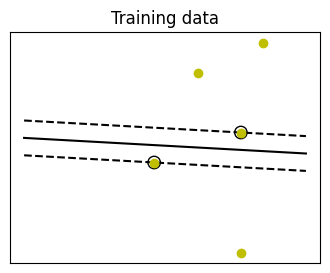

In [34]:
clf = svm.SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

#Get the separating margin
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 8)
yy = a * xx - (clf.intercept_[0]) / w[1]

#plot the parallels to the separating hyperplane that pass through the support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

#Plot the line, the points, and the nearest vectors to the plane
plt.figure(figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X_train[:, 0], X_train[:, 1], c='y', zorder=10, cmap=plt.cm.Paired)

plt.xticks(())
plt.yticks(())
plt.title('Training data')
plt.show()

5. . Plot the testing data and SVM decision boundary.

<ipython-input-35-d0ae6703ed81>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test[:, 0], X_test[:, 1], c='y', zorder=10, cmap=plt.cm.Paired)


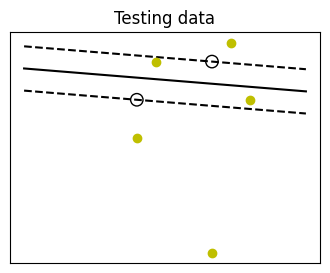

In [35]:
clf = svm.SVC(kernel='linear', random_state=42)
clf.fit(X_test, y_test)

#Get the separating margin
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 10)
yy = a * xx - (clf.intercept_[0]) / w[1]

#Plot the parallels to the separating hyperplane that pass through the support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

#Plot the line, the points, and the nearest vectors to the plane
plt.figure(figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c='y', zorder=10, cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())
plt.title('Testing data')
plt.show()

6. Scale training and testing data using standard scaler (see listing 2).

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

7.  Train SVM classifier using scaled training data and predict the output for the scaled testing data (you may use clf2 = SVC(kernel=’linear’, random_state=42) clf2.fit(X_train_scaled, y_train)). What is the accuracy of the model? Do you see accuracy improvement after feature scaling? What is the reason for this?


In [37]:
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train_scaled, y_train)

clf_preditions = clf.predict(X_test_scaled)
print(accuracy_score(clf_preditions, y_test))

1.0


8.  Plot the training data and SVM decision boundary.


<ipython-input-38-ae72cd1a0664>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[:, 0], X_train[:, 1], c='y', zorder=10, cmap=plt.cm.Paired)


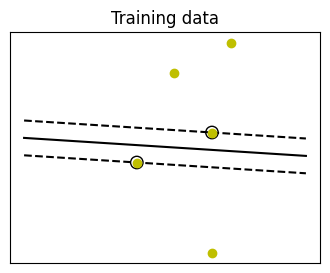

In [38]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

#Get the separating margin
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 10)
yy = a * xx - (clf.intercept_[0]) / w[1]

#Plot the parallels to the separating hyperplane that pass through the support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

#Plot the line, the points, and the nearest vectors to the plane
plt.figure(figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X_train[:, 0], X_train[:, 1], c='y', zorder=10, cmap=plt.cm.Paired)

plt.xticks(())
plt.yticks(())
plt.title('Training data')
plt.show()

9. Plot the testing data and SVM decision boundary.


<ipython-input-40-4bbd6f4cee15>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test[:, 0], X_test[:, 1], c='y', zorder=10, cmap=plt.cm.Paired)


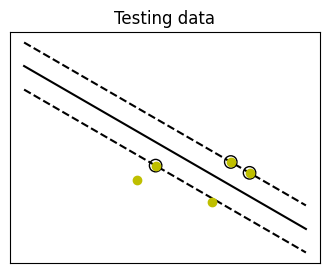

In [40]:
clf = svm.SVC(kernel='linear')
clf.fit(X_test, y_test)

#Get the separating margin
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 10)
yy = a * xx - (clf.intercept_[0]) / w[1]

#Plot the parallels to the separating hyperplane that pass through the support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

#Plot the line, the points, and the nearest vectors to the plane
plt.figure(figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c='y', zorder=10, cmap=plt.cm.Paired)

plt.xticks(())
plt.yticks(())
plt.title('Testing data')
plt.show()

10.  Plot the scaled training data and SVM decision boundary.

<ipython-input-42-9b8327d0c5ef>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c='y', zorder=10, cmap=plt.cm.Paired)


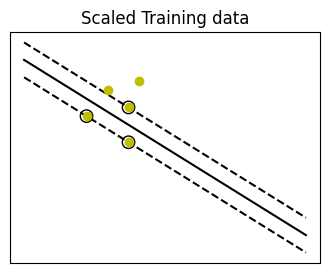

In [42]:
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train_scaled, y_train)

# get the separating margin
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 10)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot the line, the points, and the nearest vectors to the plane
plt.figure(figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c='y', zorder=10, cmap=plt.cm.Paired)

plt.xticks(())
plt.yticks(())
plt.title('Scaled Training data')
plt.show()

11.  Plot the scaled testing data and SVM decision boundary.

1.0


<ipython-input-44-a33bbf333291>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c='y', zorder=10, cmap=plt.cm.Paired)


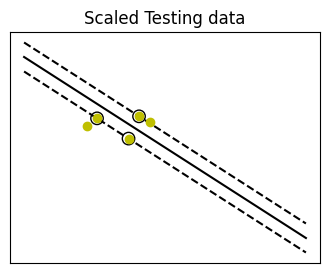

In [44]:
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_test_scaled, y_test)

clf_preditions = clf.predict(X_test_scaled)
print(accuracy_score(clf_preditions, y_test))

#Get the separating margin
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 10)
yy = a * xx - (clf.intercept_[0]) / w[1]

#Plot the parallels to the separating hyperplane that pass through the support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

#Plot the line, the points, and the nearest vectors to the plane
plt.figure(figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c='y', zorder=10, cmap=plt.cm.Paired)

plt.xticks(())
plt.yticks(())
plt.title('Scaled Testing data')
plt.show()

12. Comment on the distance from the support vectors to the decision boundary before and after feature scaling.
See SVM implementation using sklearn

13. Load the iris data set using the code given in listing 3


In [62]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# import some data to play with
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# Select only 'setosa' and 'vertical' or classes
selected_classes = ['virginica', 'versicolor']
filtered_df = iris_df[iris_df['species'].isin(selected_classes)]
y= filtered_df['species']

# Create a label encoder
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y)
filtered_df = filtered_df.drop(columns=['petal length (cm)', 'sepal width (cm)', 'petal width (cm)', 'species'])
X= filtered_df

# Split the data in to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size =0.25 , random_state=22)

print(X.head())

    sepal length (cm)
50                7.0
51                6.4
52                6.9
53                5.5
54                6.5


14. Carry out logistic regression on the IRIS dataset selecting only classes virginica and versicolor and feature sepal_length.

In [64]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_pred, y_test))

0.68


15.  Carry out kNN Classifier on the IRIS dataset selecting only classes virginica and versicolor and feature sepal_length. Here, consider three k values as k = 2, k = 9 and k = 25.

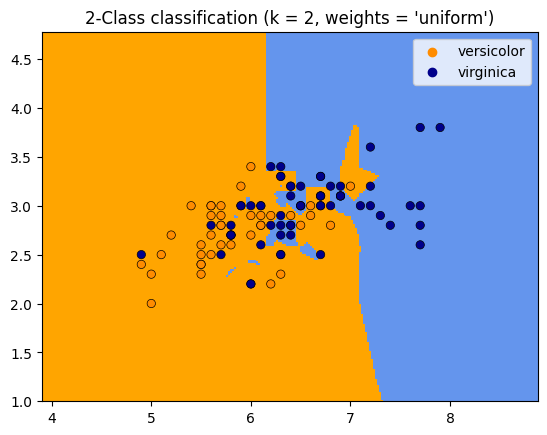

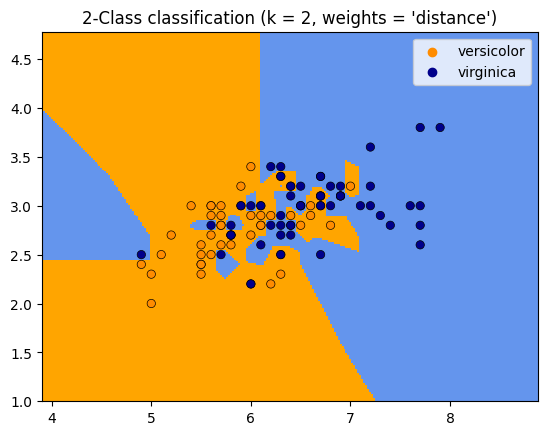

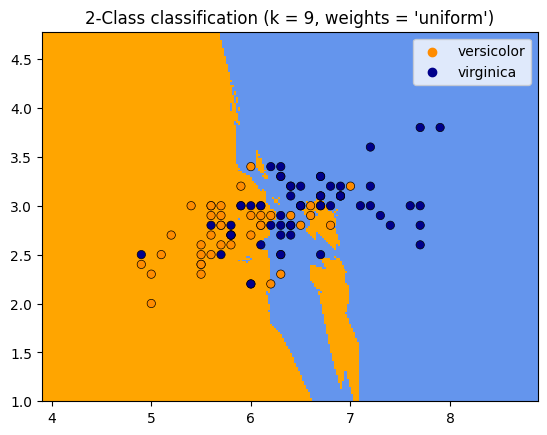

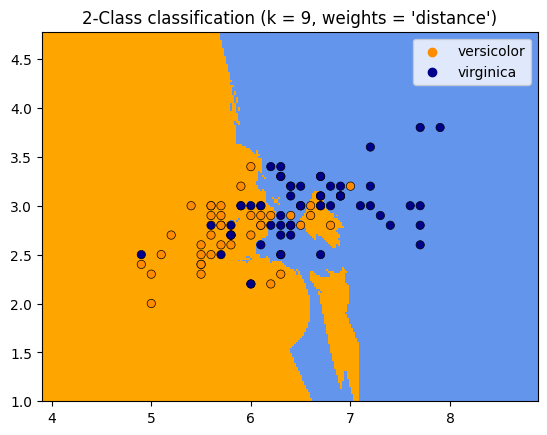

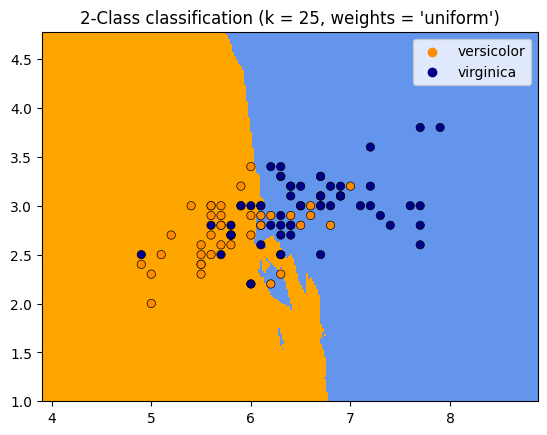

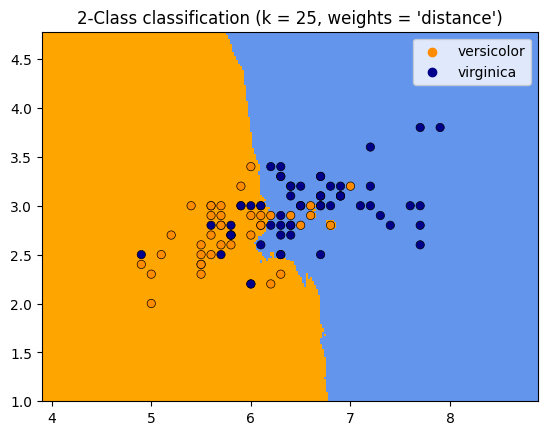

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn import datasets, neighbors

n_neighbors = [2, 9, 25]

for neighbor in n_neighbors:
  # Create color maps
  cmap_light = ListedColormap(["orange", "cornflowerblue"])
  cmap_bold = ["darkorange", "darkblue"]

  for weights in ["uniform", "distance"]:
    # Create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(neighbor, weights=weights)
    clf.fit(X, y)

    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y], palette=cmap_bold, alpha=1.0, edgecolor="black",)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')" % (neighbor, weights))

plt.show()

16. What is the impact of the k value in kNN Classifier for the accuracy of the prediction. Are we able to outperforms logistic regression? If so, what is the reason?

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

n_neighbors = [2, 9, 25]

for neighbor in n_neighbors:
    #knn = KNeighborsClassifier(neighbor)
    #knn.fit(X_train, y_train)
    #y_pred = knn.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy when k = {neighbor}, : {accuracy:.2f}')

Accuracy when k = 2, : 0.70
Accuracy when k = 9, : 0.70
Accuracy when k = 25, : 0.70
